<a href="https://colab.research.google.com/github/marymur1th1/PYTHON-ASSIGNMENTS/blob/main/Student_enrollment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df_enrollment = pd.read_csv('/content/Montgomery_College_Enrollment_Data_20250414.csv')
print("\nMontgomery College Enrollment Data - First 5 rows:")
print(df_enrollment.head(5))
print("\nMontgomery College Enrollment Data - Info Summary:")
df_enrollment.info()


Montgomery College Enrollment Data - First 5 rows:
   Fall Term Student Type Student Status  Gender     Ethnicity   Race  \
0       2015   Continuing      Full-Time  Female  Not Hispanic  White   
1       2015   Continuing      Part-Time    Male  Not Hispanic  White   
2       2015   Continuing      Part-Time    Male  Not Hispanic  Black   
3       2015          New      Full-Time    Male  Not Hispanic  Asian   
4       2015          New      Full-Time  Female      Hispanic  White   

  Attending Germantown Attending Rockville Attending Takoma Park/SS  \
0                  Yes                 Yes                       No   
1                   No                 Yes                       No   
2                   No                 Yes                       No   
3                   No                 Yes                       No   
4                   No                 Yes                       No   

  Attend Day or Evening                          MC Program Description  \
0      

In [2]:
df_performance = pd.read_csv('/content/student_performance_data.csv')
print(
"\nStudent Performance Data - First 5 rows:")
print(df_performance.head(5))
print(
"\nStudent Performance Data - Info Summary:")
df_performance.info()


Student Performance Data - First 5 rows:
   StudentID  Gender  Age  StudyHoursPerWeek  AttendanceRate   GPA      Major  \
0          1    Male   24                 37           90.75  3.47       Arts   
1          2  Female   22                 37           74.90  2.32  Education   
2          3    Male   22                 10           53.36  2.38   Business   
3          4    Male   24                 10           70.26  3.46    Science   
4          5    Male   18                 19           74.87  2.31  Education   

  PartTimeJob ExtraCurricularActivities  
0         Yes                        No  
1          No                        No  
2          No                        No  
3         Yes                        No  
4         Yes                        No  

Student Performance Data - Info Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------      

In [3]:
df_degree = pd.read_csv('/content/Student Degree College Data.csv')
print(
"\nStudent Degree College Data - First 5 rows:")
print(df_degree.head(5))
print(
"\nStudent Degree College Data - Info Summary:")
df_degree.info()


Student Degree College Data - First 5 rows:
   form_no             name category minority gender  hs_total  hs_pass_year  \
0  1801371  Susmita Bhowmik       UR       NO      F       381          2018   
1  1803096        Ankur Das       SC       NO      M       262          2018   
2  1801287   Rashmita Tanti       UR       NO      M       278          2018   
3  1803173     Sanjib Ghosh       UR       NO      M       194          2018   
4  1801077      Swarupa Pal       UR       NO      F       320          2015   

   first_choice_sub  first_choice_marks second_choice_sub  \
0       Mathematics                  80       Mathematics   
1         Education                  61           Bengali   
2  Human Physiology                  74            Botany   
3               NaN                   0               NaN   
4               NaN                   0               NaN   

   second_choice_marks first_choice_stream second_choice_stream  
0                   80    Physical Scienc

In [4]:
df_degree = df_degree.rename(columns={'gender': 'Gender'})
df_degree['Gender'] = df_degree['Gender'].replace({'M': 'Male', 'F': 'Female'})

print("Gender column standardized in df_degree.")

Gender column standardized in df_degree.


In [5]:
df_enrollment['Program'] = df_enrollment['MC Program Description']
df_performance['Program'] = df_performance['Major']
df_degree['Program'] = df_degree['first_choice_stream']

print("Unified 'Program' column created in all dataframes.")

Unified 'Program' column created in all dataframes.


In [6]:
def categorize_age(age):
    if age <= 20:
        return '20 or Younger'
    elif 21 <= age <= 24:
        return '21 - 24'
    elif 25 <= age <= 29:
        return '25 - 29'
    elif 30 <= age <= 34:
        return '30 - 34'
    elif 35 <= age <= 39:
        return '35 - 39'
    elif 40 <= age <= 49:
        return '40 - 49'
    elif age >= 50:
        return '50 or Older'
    else:
        return 'Unknown'

df_performance['Age_Category'] = df_performance['Age'].apply(categorize_age)
df_enrollment = df_enrollment.rename(columns={'Age Group': 'Age_Category'})

print("Consistent 'Age_Category' column created in df_performance and renamed in df_enrollment.")

Consistent 'Age_Category' column created in df_performance and renamed in df_enrollment.


In [7]:
df_merged_temp = pd.merge(df_performance, df_degree, on=['Gender', 'Program'], how='outer', suffixes=('_performance', '_degree'))
print("df_performance and df_degree merged into df_merged_temp.")

df_performance and df_degree merged into df_merged_temp.


In [8]:
df_unified = pd.merge(df_merged_temp, df_enrollment, on=['Gender', 'Program', 'Age_Category'], how='outer', suffixes=('_merged', '_enrollment'))
print("df_unified created by merging df_merged_temp and df_enrollment.")

df_unified created by merging df_merged_temp and df_enrollment.


In [9]:
gpa_threshold = 2.5
mean_gpa = df_unified['GPA'].mean()
df_unified['GPA'].fillna(mean_gpa, inplace=True)
df_unified['needs_graduation_support'] = df_unified['GPA'].apply(lambda x: 1 if x < gpa_threshold else 0)

print("'needs_graduation_support' target variable created.")

'needs_graduation_support' target variable created.


/tmp/ipython-input-2164688887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unified['GPA'].fillna(mean_gpa, inplace=True)


In [10]:
gpa_threshold = 2.5
mean_gpa = df_unified['GPA'].mean()
df_unified['GPA'] = df_unified['GPA'].fillna(mean_gpa)
df_unified['needs_graduation_support'] = df_unified['GPA'].apply(lambda x: 1 if x < gpa_threshold else 0)

# Define the 'enrollment prediction' target variable
df_unified['is_full_time_enrolled'] = df_unified['Student Status'].apply(lambda x: 1 if x == 'Full-Time' else 0)

print("'needs_graduation_support' and 'is_full_time_enrolled' target variables created.")

# Display the first few rows and info of df_unified
print("\nUnified DataFrame - First 5 rows:")
print(df_unified.head())
print("\nUnified DataFrame - Info Summary:")
df_unified.info()

'needs_graduation_support' and 'is_full_time_enrolled' target variables created.

Unified DataFrame - First 5 rows:
   StudentID  Gender  Age  StudyHoursPerWeek  AttendanceRate       GPA Major  \
0        NaN  Female  NaN                NaN             NaN  3.010393   NaN   
1        NaN  Female  NaN                NaN             NaN  3.010393   NaN   
2        NaN  Female  NaN                NaN             NaN  3.010393   NaN   
3        NaN  Female  NaN                NaN             NaN  3.010393   NaN   
4        NaN  Female  NaN                NaN             NaN  3.010393   NaN   

  PartTimeJob ExtraCurricularActivities                Program  ...  \
0         NaN                       NaN  Accounting (AA & AAS)  ...   
1         NaN                       NaN  Accounting (AA & AAS)  ...   
2         NaN                       NaN  Accounting (AA & AAS)  ...   
3         NaN                       NaN  Accounting (AA & AAS)  ...   
4         NaN                       NaN  Account

In [11]:
columns_to_drop = ['StudentID', 'form_no', 'name', 'MC Program Description', 'Major', 'first_choice_stream', 'second_choice_stream']
df_unified = df_unified.drop(columns=columns_to_drop, errors='ignore')

print(f"Dropped columns: {columns_to_drop}")
print("Remaining columns after dropping:")
print(df_unified.columns.tolist())

Dropped columns: ['StudentID', 'form_no', 'name', 'MC Program Description', 'Major', 'first_choice_stream', 'second_choice_stream']
Remaining columns after dropping:
['Gender', 'Age', 'StudyHoursPerWeek', 'AttendanceRate', 'GPA', 'PartTimeJob', 'ExtraCurricularActivities', 'Program', 'Age_Category', 'category', 'minority', 'hs_total', 'hs_pass_year', 'first_choice_sub', 'first_choice_marks', 'second_choice_sub', 'second_choice_marks', 'Fall Term', 'Student Type', 'Student Status', 'Ethnicity', 'Race', 'Attending Germantown', 'Attending Rockville', 'Attending Takoma Park/SS', 'Attend Day or Evening', 'HS Category', 'MCPS High School', 'City in MD', 'State', 'ZIP', 'County in MD', 'needs_graduation_support', 'is_full_time_enrolled']


In [12]:
numerical_cols = df_unified.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_unified.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

Numerical columns: ['Age', 'StudyHoursPerWeek', 'AttendanceRate', 'GPA', 'hs_total', 'hs_pass_year', 'first_choice_marks', 'second_choice_marks', 'Fall Term', 'ZIP', 'needs_graduation_support', 'is_full_time_enrolled']
Categorical columns: ['Gender', 'PartTimeJob', 'ExtraCurricularActivities', 'Program', 'Age_Category', 'category', 'minority', 'first_choice_sub', 'second_choice_sub', 'Student Type', 'Student Status', 'Ethnicity', 'Race', 'Attending Germantown', 'Attending Rockville', 'Attending Takoma Park/SS', 'Attend Day or Evening', 'HS Category', 'MCPS High School', 'City in MD', 'State', 'County in MD']


In [13]:
for col in numerical_cols:
    if df_unified[col].isnull().any():
        median_val = df_unified[col].median()
        df_unified[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in numerical column '{col}' with median: {median_val}")

print("Numerical missing values imputation complete.")

Imputed missing values in numerical column 'Age' with median: 21.0
Imputed missing values in numerical column 'StudyHoursPerWeek' with median: 20.0
Imputed missing values in numerical column 'AttendanceRate' with median: 72.76
Imputed missing values in numerical column 'hs_total' with median: 250.0
Imputed missing values in numerical column 'hs_pass_year' with median: 2018.0
Imputed missing values in numerical column 'first_choice_marks' with median: 53.0
Imputed missing values in numerical column 'second_choice_marks' with median: 53.0
Imputed missing values in numerical column 'Fall Term' with median: 2015.0
Imputed missing values in numerical column 'ZIP' with median: 20877.0
Numerical missing values imputation complete.


/tmp/ipython-input-548011921.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unified[col].fillna(median_val, inplace=True)


In [14]:
for col in numerical_cols:
    if df_unified[col].isnull().any():
        median_val = df_unified[col].median()
        df_unified[col] = df_unified[col].fillna(median_val)
        print(f"Imputed missing values in numerical column '{col}' with median: {median_val}")

print("Numerical missing values imputation complete.")

for col in categorical_cols:
    if df_unified[col].isnull().any():
        mode_val = df_unified[col].mode()[0] # [0] to handle cases with multiple modes
        df_unified[col] = df_unified[col].fillna(mode_val)
        print(f"Imputed missing values in categorical column '{col}' with mode: {mode_val}")

print("Categorical missing values imputation complete.")

Numerical missing values imputation complete.
Imputed missing values in categorical column 'PartTimeJob' with mode: Yes
Imputed missing values in categorical column 'ExtraCurricularActivities' with mode: Yes
Imputed missing values in categorical column 'Age_Category' with mode: 21 - 24
Imputed missing values in categorical column 'category' with mode: UR
Imputed missing values in categorical column 'minority' with mode: NO
Imputed missing values in categorical column 'first_choice_sub' with mode: Political Science
Imputed missing values in categorical column 'second_choice_sub' with mode: Political Science
Imputed missing values in categorical column 'Student Type' with mode: Continuing
Imputed missing values in categorical column 'Student Status' with mode: Part-Time
Imputed missing values in categorical column 'Ethnicity' with mode: Not Hispanic
Imputed missing values in categorical column 'Race' with mode: White
Imputed missing values in categorical column 'Attending Germantown' wit

In [15]:
df_unified = pd.get_dummies(df_unified, columns=categorical_cols, drop_first=True)
print("One-hot encoding applied to categorical columns.")

One-hot encoding applied to categorical columns.


In [16]:
print("\nUnified DataFrame after preprocessing - First 5 rows:")
print(df_unified.head())
print("\nUnified DataFrame after preprocessing - Info Summary:")
df_unified.info()


Unified DataFrame after preprocessing - First 5 rows:
    Age  StudyHoursPerWeek  AttendanceRate       GPA  hs_total  hs_pass_year  \
0  21.0               20.0           72.76  3.010393     250.0        2018.0   
1  21.0               20.0           72.76  3.010393     250.0        2018.0   
2  21.0               20.0           72.76  3.010393     250.0        2018.0   
3  21.0               20.0           72.76  3.010393     250.0        2018.0   
4  21.0               20.0           72.76  3.010393     250.0        2018.0   

   first_choice_marks  second_choice_marks  Fall Term      ZIP  ...  \
0                53.0                 53.0     2015.0  20906.0  ...   
1                53.0                 53.0     2015.0  20874.0  ...   
2                53.0                 53.0     2015.0  20852.0  ...   
3                53.0                 53.0     2015.0  20910.0  ...   
4                53.0                 53.0     2015.0  20910.0  ...   

   County in MD_Kent  County in MD_Mo

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib and Seaborn imported.")

Matplotlib and Seaborn imported.


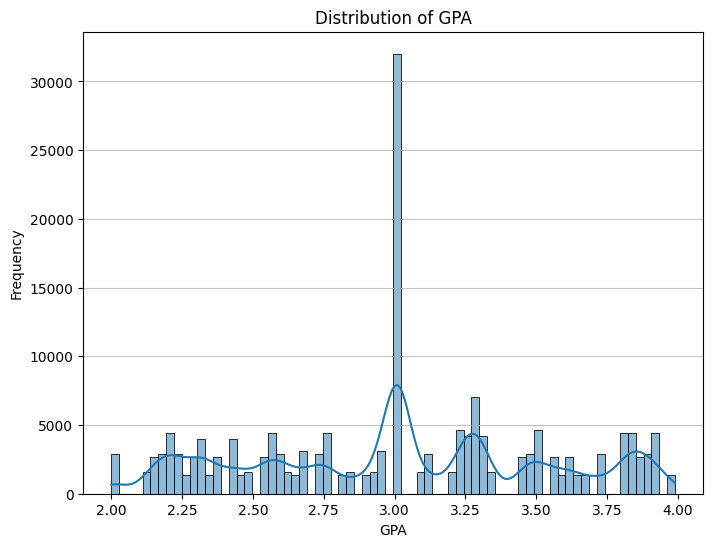

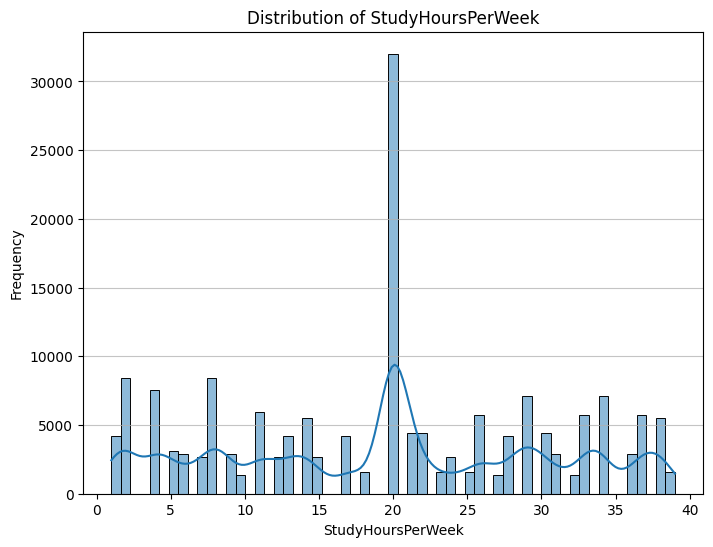

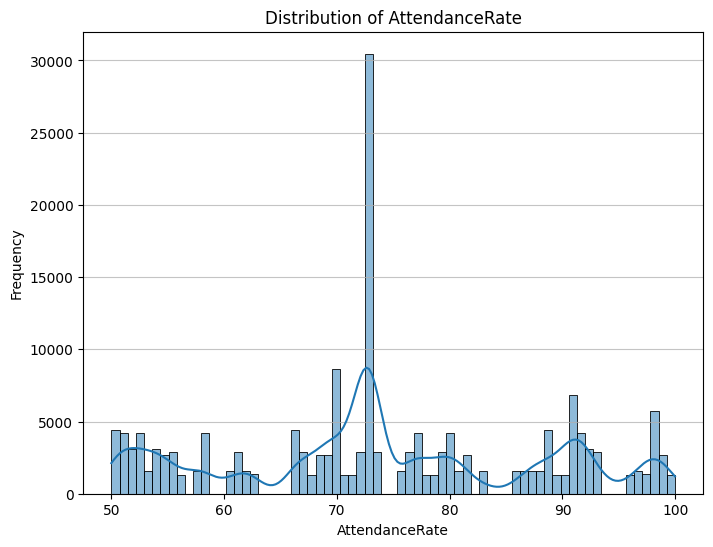

Histograms for numerical feature distributions generated.


In [18]:
numerical_features = ['GPA', 'StudyHoursPerWeek', 'AttendanceRate']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_unified[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

print("Histograms for numerical feature distributions generated.")

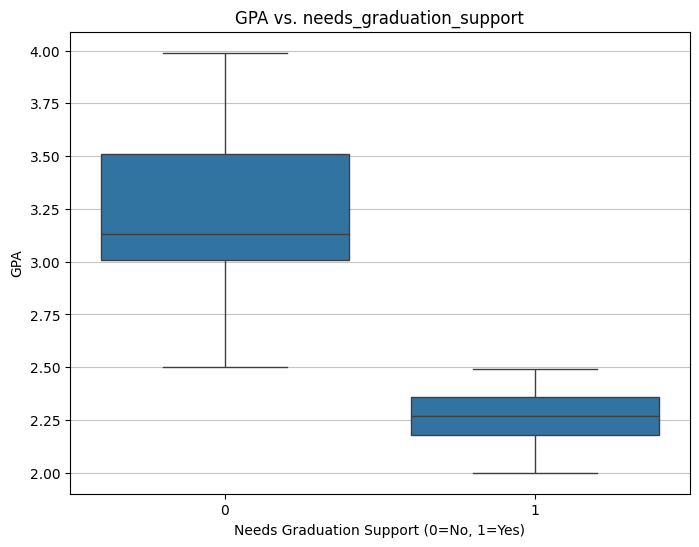

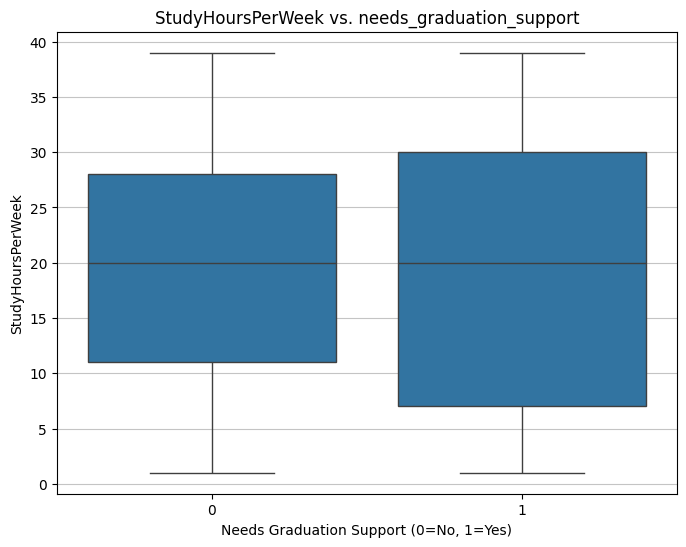

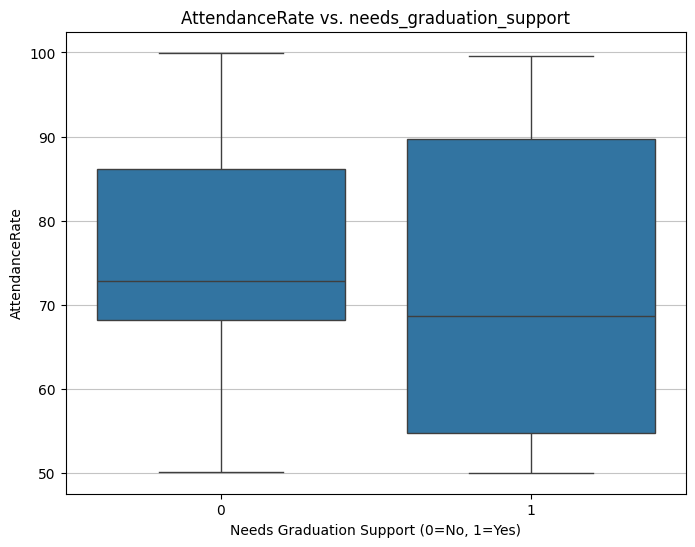

Box plots for numerical features vs. 'needs_graduation_support' generated.


In [19]:
numerical_features = ['GPA', 'StudyHoursPerWeek', 'AttendanceRate']
target_graduation = 'needs_graduation_support'

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_graduation, y=col, data=df_unified)
    plt.title(f'{col} vs. {target_graduation}')
    plt.xlabel('Needs Graduation Support (0=No, 1=Yes)')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

print("Box plots for numerical features vs. 'needs_graduation_support' generated.")

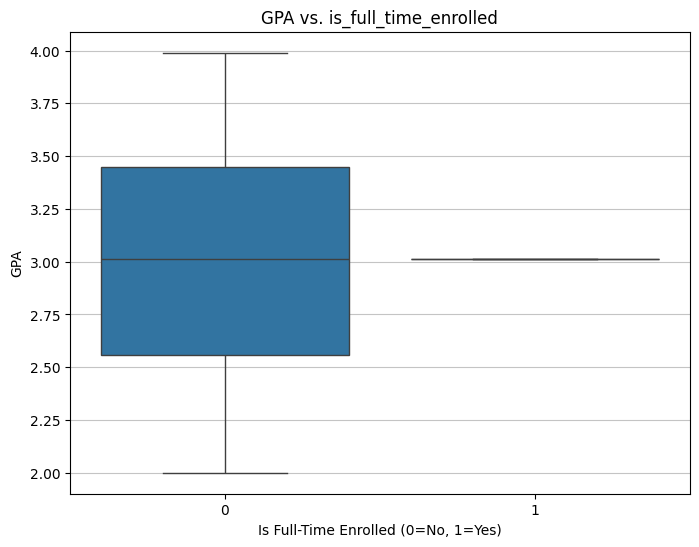

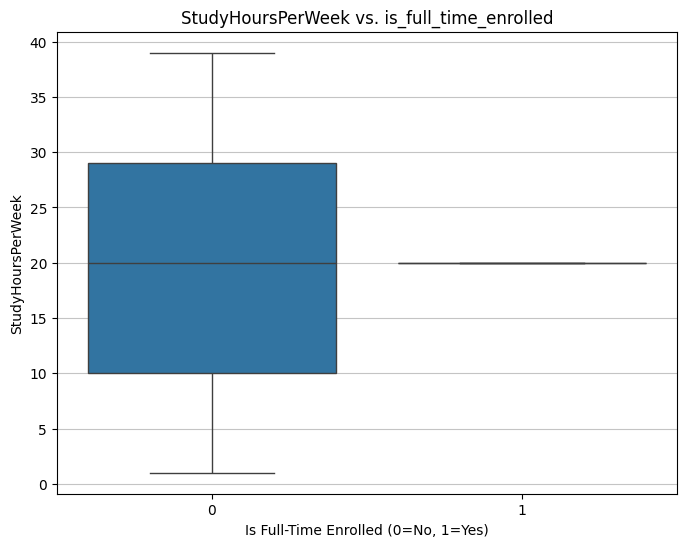

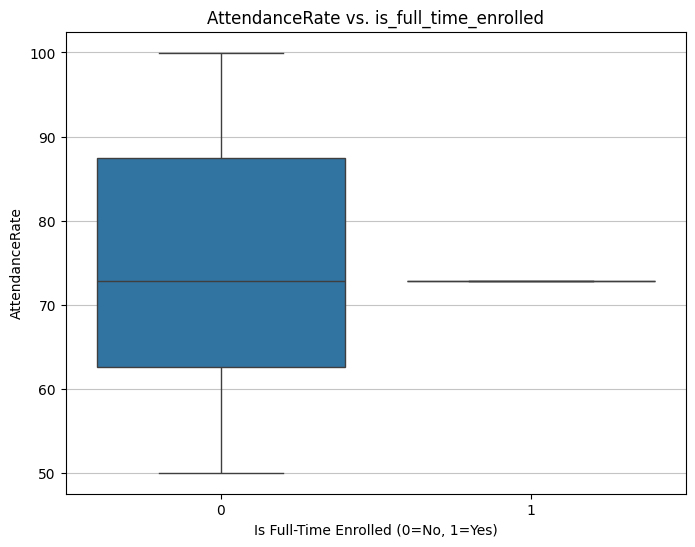

Box plots for numerical features vs. 'is_full_time_enrolled' generated.


In [20]:
numerical_features = ['GPA', 'StudyHoursPerWeek', 'AttendanceRate']
target_enrollment = 'is_full_time_enrolled'

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_enrollment, y=col, data=df_unified)
    plt.title(f'{col} vs. {target_enrollment}')
    plt.xlabel('Is Full-Time Enrolled (0=No, 1=Yes)')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

print("Box plots for numerical features vs. 'is_full_time_enrolled' generated.")

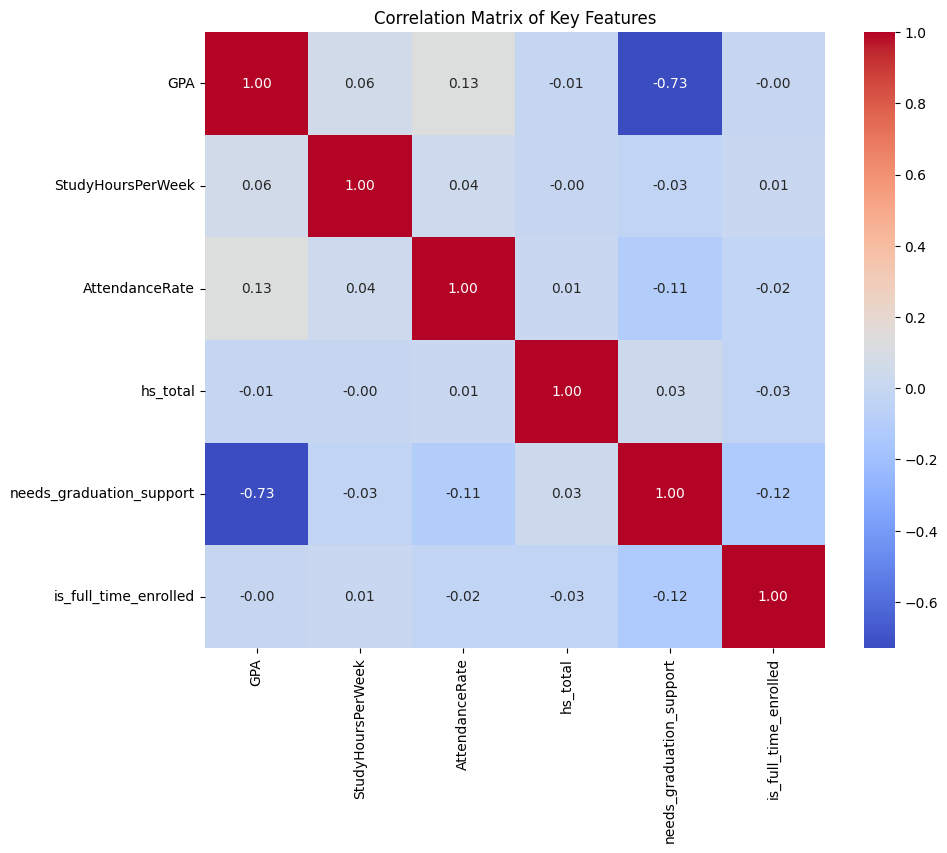

Correlation heatmap for key features generated.


In [21]:
correlation_features = ['GPA', 'StudyHoursPerWeek', 'AttendanceRate', 'hs_total', 'needs_graduation_support', 'is_full_time_enrolled']

plt.figure(figsize=(10, 8))
sns.heatmap(df_unified[correlation_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features')
plt.show()

print("Correlation heatmap for key features generated.")

In [22]:
X = df_unified.drop(columns=['is_full_time_enrolled', 'needs_graduation_support'])
y_enrollment = df_unified['is_full_time_enrolled']
y_graduation = df_unified['needs_graduation_support']

print("Features (X) and target variables (y_enrollment, y_graduation) separated.")

Features (X) and target variables (y_enrollment, y_graduation) separated.


In [23]:
from sklearn.model_selection import train_test_split

# Split data for enrollment prediction
X_train_enrollment, X_test_enrollment, y_train_enrollment, y_test_enrollment = train_test_split(X, y_enrollment, test_size=0.2, random_state=42)

# Split data for graduation support prediction
X_train_graduation, X_test_graduation, y_train_graduation, y_test_graduation = train_test_split(X, y_graduation, test_size=0.2, random_state=42)

print("Data split into training and testing sets for enrollment and graduation prediction models.")

Data split into training and testing sets for enrollment and graduation prediction models.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

print("LogisticRegression and evaluation metrics imported.")

LogisticRegression and evaluation metrics imported.


In [25]:
model_enrollment = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter for convergence
model_enrollment.fit(X_train_enrollment, y_train_enrollment)

y_pred_enrollment = model_enrollment.predict(X_test_enrollment)

print("\nEnrollment Prediction Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_enrollment, y_pred_enrollment):.4f}")
print(classification_report(y_test_enrollment, y_pred_enrollment))

print("Enrollment prediction model trained and evaluated.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Enrollment Prediction Model Performance:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32368
           1       1.00      1.00      1.00      1735

    accuracy                           1.00     34103
   macro avg       1.00      1.00      1.00     34103
weighted avg       1.00      1.00      1.00     34103

Enrollment prediction model trained and evaluated.


In [26]:
model_graduation = LogisticRegression(max_iter=1000, random_state=42)
model_graduation.fit(X_train_graduation, y_train_graduation)

y_pred_graduation = model_graduation.predict(X_test_graduation)

print("\nGraduation Support Prediction Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_graduation, y_pred_graduation):.4f}")
print(classification_report(y_test_graduation, y_pred_graduation))

print("Graduation support prediction model trained and evaluated.")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Graduation Support Prediction Model Performance:
Accuracy: 0.9778
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     26956
           1       0.95      0.94      0.95      7147

    accuracy                           0.98     34103
   macro avg       0.97      0.96      0.97     34103
weighted avg       0.98      0.98      0.98     34103

Graduation support prediction model trained and evaluated.


In [27]:
model_graduation = LogisticRegression(max_iter=5000, random_state=42, solver='liblinear') # Increased max_iter and specified solver
model_graduation.fit(X_train_graduation, y_train_graduation)

y_pred_graduation = model_graduation.predict(X_test_graduation)

print("\nGraduation Support Prediction Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_graduation, y_pred_graduation):.4f}")
print(classification_report(y_test_graduation, y_pred_graduation))

print("Graduation support prediction model trained and evaluated.")


Graduation Support Prediction Model Performance:
Accuracy: 0.9195
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     26956
           1       0.99      0.62      0.76      7147

    accuracy                           0.92     34103
   macro avg       0.95      0.81      0.86     34103
weighted avg       0.93      0.92      0.91     34103

Graduation support prediction model trained and evaluated.
